<h2 style='color:blue' align='center'>Transfer learning in image classification</h2>

In [1]:
# Instalar tensorflow_hub usando pip install tensorflow_hub 
# pip install tensorflow
# pip install matplotlib
# pip install opencv-python
# pip install tensorflow-hub
# pip install -U scikit-learn

In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Haciando predicciones usando un modelo ya hecho (sin ningún tipo de entrenamiento)**

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

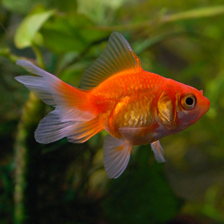

In [4]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [6]:
#PAra añadir una entrada y asi poder predecir para cada clase
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [7]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [8]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [9]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [10]:
image_labels[predicted_label_index]

'goldfish'

<h3 style='color:purple'>Cargar conjunto de datos de Imagenes </h3>

In [11]:
os.getcwd()

'C:\\Users\\ACER\\Deep Learning Scripts\\deep-learning-keras-tf-tutorial-master\\18_transfer_learning'

In [12]:
data_dir="datosDEF/Fotos"

In [13]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datosDEF/Fotos')

In [14]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datosDEF/Fotos/Arboles/img_00003.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00004.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00009.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00010.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00012.jpg')]

In [15]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

6625


In [16]:
roses = list(data_dir.glob('Arboles/*'))
roses[:5]

[WindowsPath('datosDEF/Fotos/Arboles/img_00003.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00004.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00009.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00010.jpg'),
 WindowsPath('datosDEF/Fotos/Arboles/img_00012.jpg')]

In [17]:
#Image.open(str(roses[1]))

In [18]:
#tulips = list(data_dir.glob('tulips/*'))
#Image.open(str(tulips[0]))

<h3 style='color:purple'>Lecutra de las imagenes del disco en una matriz numpy usando opencv</h3>

In [19]:
flowers_images_dict = {
    #'roses': list(data_dir.glob('roses/*')),
    #'daisy': list(data_dir.glob('daisy/*')),
    #'dandelion': list(data_dir.glob('dandelion/*')),
    #'sunflowers': list(data_dir.glob('sunflowers/*')),
    #'tulips': list(data_dir.glob('tulips/*')),
    'Arboles': list(data_dir.glob("Arboles/*")),
    'Deforestacion': list(data_dir.glob("Deforestacion/*")),
}

In [20]:
flowers_labels_dict = {
    #'roses': 0,
    #'daisy': 1,
    #'dandelion': 2,
    #'sunflowers': 3,
    #'tulips': 4,
    'Arboles':0,
    'Deforestacion':1,
}

In [21]:
flowers_images_dict['Deforestacion']

[WindowsPath('datosDEF/Fotos/Deforestacion/Captura de pantalla 2022-01-22 143343.png'),
 WindowsPath('datosDEF/Fotos/Deforestacion/Captura de pantalla 2022-01-22 143357.png'),
 WindowsPath('datosDEF/Fotos/Deforestacion/Captura de pantalla 2022-01-22 143404.png'),
 WindowsPath('datosDEF/Fotos/Deforestacion/Captura de pantalla 2022-01-22 143414.png'),
 WindowsPath('datosDEF/Fotos/Deforestacion/Captura de pantalla 2022-01-22 143422.png'),
 WindowsPath('datosDEF/Fotos/Deforestacion/Captura de pantalla 2022-01-22 143430.png'),
 WindowsPath('datosDEF/Fotos/Deforestacion/Captura de pantalla 2022-01-22 143444.png'),
 WindowsPath('datosDEF/Fotos/Deforestacion/Captura de pantalla 2022-01-22 143452.png'),
 WindowsPath('datosDEF/Fotos/Deforestacion/Captura de pantalla 2022-01-22 143501.png'),
 WindowsPath('datosDEF/Fotos/Deforestacion/Captura de pantalla 2022-01-22 143513.png'),
 WindowsPath('datosDEF/Fotos/Deforestacion/Captura de pantalla 2022-01-22 143522.png'),
 WindowsPath('datosDEF/Fotos/Def

In [22]:
str(flowers_images_dict['Deforestacion'][0])

'datosDEF\\Fotos\\Deforestacion\\Captura de pantalla 2022-01-22 143343.png'

In [23]:
img = cv2.imread(str(flowers_images_dict['Arboles'][0]))

In [24]:
img.shape

(256, 256, 3)

In [25]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [26]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [27]:
X = np.array(X)
y = np.array(y)

In [87]:
y

array([0, 0, 0, ..., 1, 1, 1])

<h3 style='color:purple'>Division de Datos</h3>

In [29]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_val_1, y_train, y_val_1 = train_test_split(X, y, test_size=0.5)

In [30]:
X_val, X_test, y_val, y_test = train_test_split(X_val_1, y_val_1, test_size=0.5)

In [31]:
print("Longitud subcojunto de entrenamiento: ", len(X_train))
print("Longitud subconjunto de validación: ", len(X_val))
print("Longitud subconjutno de pruebas: ", len(X_test))

Longitud subcojunto de entrenamiento:  3380
Longitud subconjunto de validación:  1690
Longitud subconjutno de pruebas:  1690


<h3 style='color:purple'>Preprocesamiento: escala de imagenes</h3>

In [32]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255
X_val_scaled = X_val / 255

In [33]:
print(X_train_scaled.shape)
print(y_train.shape)

(3380, 224, 224, 3)
(3380,)


<h3 style='color:purple'>Carga del modelo Preentrenadao desde Tensorflof-Hub.</h3>

In [34]:
#from tensorflow.keras.applications import VGG16
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)



#pre_trained_model = VGG16(input_shape = (224, 224, 3), 
#                                include_top = False, 
#                                weights = 'imagenet')
#IMG_SIZE = (160, 160)
#IMG_SHAPE = IMG_SIZE + (3,)
#base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
#                                               include_top=False,
#                                               weights='imagenet')

In [35]:
#for layer in pre_trained_model.layers:
#  layer.trainable = False

**Aumento de datos**

In [36]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(224, 
                                                              224,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [37]:
num_of_flowers = 2

model = tf.keras.Sequential([
  data_augmentation,
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(1,activation="sigmoid")
])

**Estructura del modelo**

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


**Entrenamiento del modelo**

In [39]:
model.compile(
  optimizer="adam",
  loss="binary_crossentropy",
  metrics=['acc'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(
#    log_dir=log_dir,
#    histogram_freq=1) # Enable histogram computation for every epoch.

In [40]:
history = model.fit(
    X_train_scaled, 
    y_train, 
    epochs=7,
    batch_size=32,
    callbacks=[tb_callback],
    validation_data=(X_val_scaled,y_val))
#loss: 0.3153 - acc: 0.8527 - val_loss: 0.3572 - val_acc: 0.8278
#loss: 0.3302 - acc: 0.8438 - val_loss: 0.3322 - val_acc: 0.8521

Epoch 1/7
106/106 [==============================] - 98s 858ms/step - loss: 0.4131 - acc: 0.8000 - val_loss: 0.3616 - val_acc: 0.8367
Epoch 2/7
106/106 [==============================] - 81s 765ms/step - loss: 0.3512 - acc: 0.8405 - val_loss: 0.3493 - val_acc: 0.8367
Epoch 3/7
106/106 [==============================] - 85s 808ms/step - loss: 0.3373 - acc: 0.8441 - val_loss: 0.3469 - val_acc: 0.8343
Epoch 4/7
106/106 [==============================] - 89s 840ms/step - loss: 0.3402 - acc: 0.8432 - val_loss: 0.3439 - val_acc: 0.8361
Epoch 5/7
106/106 [==============================] - 79s 749ms/step - loss: 0.3308 - acc: 0.8482 - val_loss: 0.3405 - val_acc: 0.8396
Epoch 6/7
106/106 [==============================] - 84s 795ms/step - loss: 0.3285 - acc: 0.8464 - val_loss: 0.3444 - val_acc: 0.8379
Epoch 7/7
106/106 [==============================] - 94s 888ms/step - loss: 0.3262 - acc: 0.8524 - val_loss: 0.3493 - val_acc: 0.8402


In [41]:
from keras.models import load_model
model.save('forestacion_model.h5')

In [42]:
# loss: 0.0368 - acc: 0.9881 - val_loss: 0.5889 - val_acc: 0.8802
history.history

{'loss': [0.4130961000919342,
  0.35124626755714417,
  0.33729028701782227,
  0.34016337990760803,
  0.3307745158672333,
  0.32851946353912354,
  0.3262391686439514],
 'acc': [0.800000011920929,
  0.8405325412750244,
  0.8440828323364258,
  0.8431952595710754,
  0.8482248783111572,
  0.8464497327804565,
  0.8523668646812439],
 'val_loss': [0.3615547716617584,
  0.3492661416530609,
  0.3469330072402954,
  0.34393641352653503,
  0.3405272662639618,
  0.34439024329185486,
  0.3492748737335205],
 'val_acc': [0.836686372756958,
  0.836686372756958,
  0.834319531917572,
  0.8360946774482727,
  0.8396449685096741,
  0.8378698229789734,
  0.8402366638183594]}

**Visualizacion de conjunto de validacion**

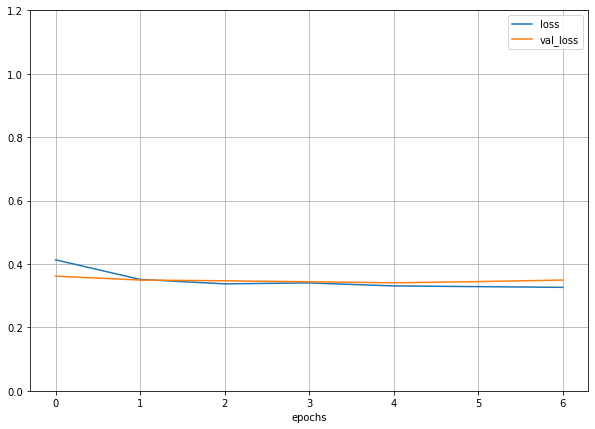

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("epochs")
plt.show()

**Evaluacion del modelo**

In [44]:
model.evaluate(X_test_scaled,y_test)
# loss: 0.3685 - acc: 0.8414
#loss: 0.3796 - acc: 0.8296
#[0.36550018191337585, 0.8295857906341553]
#[0.33627554774284363, 0.8526627421379089]

53/53 [==============================] - 30s 557ms/step - loss: 0.3404 - acc: 0.8503


[0.3403587341308594, 0.8502958416938782]

**Realizando predicciones con la red entrenada**
- 0 : Sin deforestacion
- 1 : Deforestacion

In [77]:
A = 30
B = 30+9

In [78]:
y_test[A:B]

array([1, 0, 0, 1, 0, 1, 0, 1, 1])

**Visualizacion de los datos de Prueba**

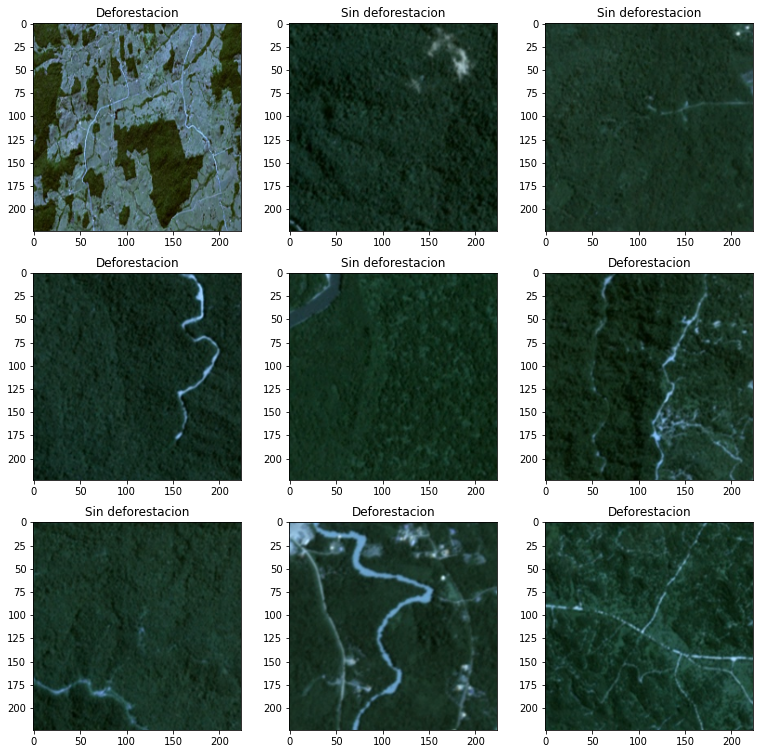

In [79]:
w = 10
h = 10
fig = plt.figure(figsize=(13, 13))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = X_test[A+i-1]
    ax = fig.add_subplot(rows, columns, i)
    if y_test[A+i-1] == 1:
        t="Deforestacion"
    else:
        t="Sin deforestacion"
    ax.set_title(t)
    plt.imshow(img)
plt.show()

**Visualizacion de los datos predecidos**

In [80]:
predicted = model.predict(X_test_scaled[A:B])
#predicted = np.argmax(predicted, axis=1)

In [81]:
predicted = predicted.round()

In [82]:
predicted

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [83]:
y_test[A:B]

array([1, 0, 0, 1, 0, 1, 0, 1, 1])

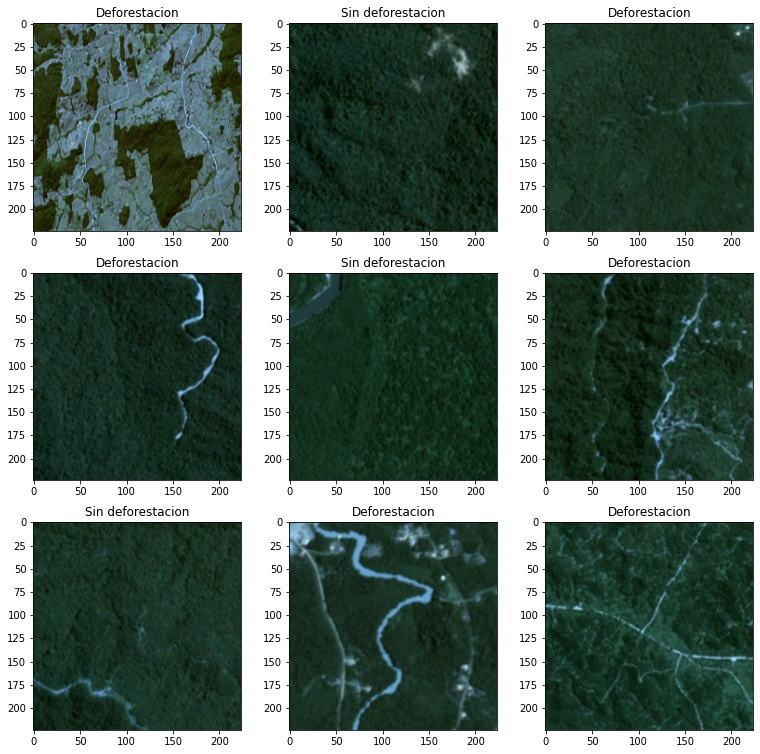

In [84]:
w = 10
h = 10
fig = plt.figure(figsize=(13, 13))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = X_test[A+i-1]
    ax = fig.add_subplot(rows, columns, i)
    if predicted[i-1] == 1:
        t="Deforestacion"
    else:
        t="Sin deforestacion"
    ax.set_title(t)
    plt.imshow(img)
plt.show()